In [1]:
#run this in terminal

#conda create -n jup python=3.10
#conda activate jup
#pip list


In [2]:
#pip install jupyter jupyter-scatter numpy pandas scikit-learn
#!pip install jupyter-scatter

#pip install --upgrade pip
#!pip install jupyter-scatter
#!pip install jupyter_scatter
#!pip install jscatter
#!pip install umap-learn

In [3]:
#pip install jupyter_scatter==0.15.1
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
#!pip install --upgrade jscatter


In [4]:
#!pip install --upgrade jupyterlab
#!pip install jupyter-scatter scikit-learn pandas umap-learn

#jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-scatter

### task 0

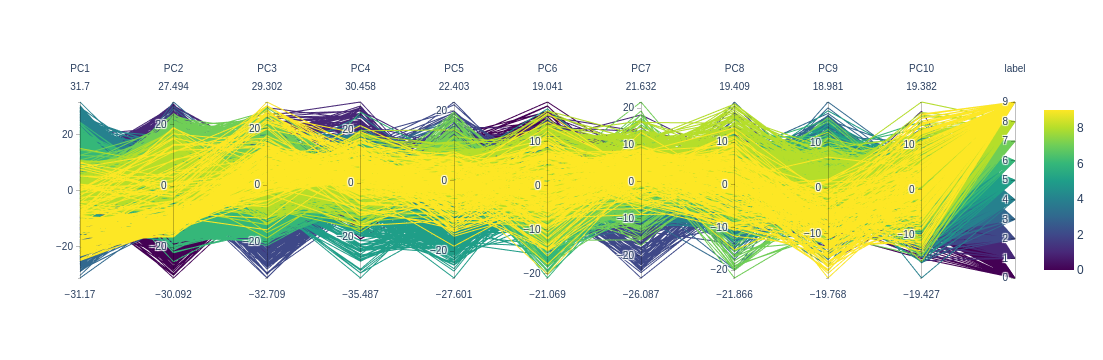

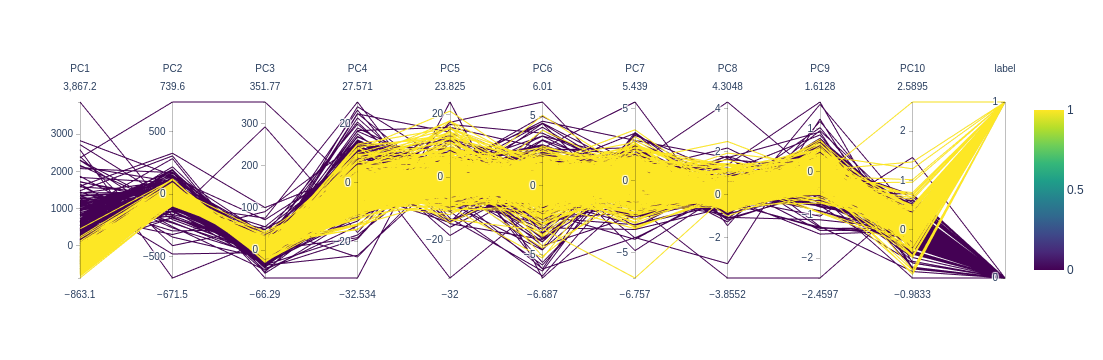

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Load datasets
digits = load_digits()
breast_cancer = load_breast_cancer()

# Perform PCA to reduce dimensions to 10
def pca_transform(data, n_components=10):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Apply PCA
digits_pca = pca_transform(digits.data)
breast_cancer_pca = pca_transform(breast_cancer.data)

# Convert PCA results and labels to a format suitable for Plotly
def convert_to_plotly_format(pca_data, labels):
    df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
    df['label'] = labels
    return df

# Convert to DataFrame
digits_df = convert_to_plotly_format(digits_pca, digits.target)
breast_cancer_df = convert_to_plotly_format(breast_cancer_pca, breast_cancer.target)

# Create the parallel coordinates plot
def create_parallel_coordinates_plot(df, num_dimensions=10):
    dimensions = []
    for i in range(num_dimensions):
        dimensions.append(
            dict(
                label=f'PC{i+1}',
                values=df[f'PC{i+1}']
            )
        )
    dimensions.append(
        dict(
            label='label',
            values=df['label'],
            tickvals=list(df['label'].unique()),
            ticktext=[str(label) for label in df['label'].unique()],
            range=[min(df['label']), max(df['label'])]
        )
    )
    
    fig = go.Figure(data=
        go.Parcoords(
            line=dict(color=df['label'], colorscale='Viridis', showscale=True),
            dimensions=dimensions
        )
    )
    
    return fig

# Create plots
digits_plot = create_parallel_coordinates_plot(digits_df)
breast_cancer_plot = create_parallel_coordinates_plot(breast_cancer_df)

# Display plots
digits_plot.show()
breast_cancer_plot.show()

# Save PNG images of filtered states after manual interaction
# This part needs to be done interactively in the web browser
# 1. Use mouse drag to define filter intervals at each axis.
# 2. Reorder axes if necessary by dragging the axis label.
# 3. Use the button on the top right to save PNG images of the parallel coordinates plot.


## Task 1 

In [32]:
from sklearn.datasets import load_digits
import pandas as pd

# Load Digits dataset
digits = load_digits()

# Convert to DataFrame
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names if hasattr(digits, 'feature_names') else [f'pixel_{i}' for i in range(digits.data.shape[1])])

# Calculate the sum of null values
digits_null_sum = digits_df.isnull().sum()
total_digits_null_sum = digits_null_sum.sum()

print("Sum of null values for each column in Digits dataset:")
print(digits_null_sum)
print("\nTotal sum of null values in the Digits dataset:")
print(total_digits_null_sum)

Sum of null values for each column in Digits dataset:
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

Total sum of null values in the Digits dataset:
0


In [33]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Convert to DataFrame
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Calculate the sum of null values
breast_cancer_null_sum = breast_cancer_df.isnull().sum()
total_breast_cancer_null_sum = breast_cancer_null_sum.sum()

print("Sum of null values for each column in Breast Cancer dataset:")
print(breast_cancer_null_sum)
print("\nTotal sum of null values in the Breast Cancer dataset:")
print(total_breast_cancer_null_sum)


Sum of null values for each column in Breast Cancer dataset:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Total sum of null values in the Breast Cancer dataset:


In [25]:
import numpy as np
import pandas as pd
import umap
from sklearn.datasets import load_digits, load_breast_cancer
import jscatter

digits_data = load_digits()
cancer_data = load_breast_cancer()

# Apply UMAP
umap_cancer = umap.UMAP(n_components=2,)
cancer_umap_results = umap_cancer.fit_transform(cancer_data.data)

umap_digits = umap.UMAP(n_components=2,)
digit_umap_results = umap_digits.fit_transform(digits_data.data)




a, b =  jscatter.Scatter(x=cancer_umap_results[:, 0], y=cancer_umap_results[:, 1], color_by=cancer_data.target, legend=True 
                        ), jscatter.Scatter(x=digit_umap_results[:, 0], y=digit_umap_results[:, 1], 
                                            color_by=digits_data.target, legend=True)

jscatter.link([a, b])
#scatter_tsne.selection(df_TSNE_dim2.query('Target < 0.5').index)
#scatter_tsne.color(by=df_TSNE_dim2.Target)
# Link the two scatter plots
#jscatter.link([scatter_tsne, scatter_umap])

#scatter_tsne.show()
#scatter_umap.show()

GridBox(children=(HBox(children=(VBox(children=(Button(button_style='primary', icon='arrows', layout=Layout(wi…

In [11]:
import jscatter
print(dir(jscatter))


['PackageNotFoundError', 'Scatter', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'color_maps', 'compose', 'encodings', 'glasbey_dark', 'glasbey_light', 'jscatter', 'link', 'okabe_ito', 'plot', 'types', 'utils', 'version', 'widget']


In [23]:
# Load datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits, load_breast_cancer
import jscatter
from sklearn.manifold import TSNE



# Load datasets
cancer_data = load_breast_cancer()
digits_data = load_digits()

# Perform t-SNE on breast cancer dataset
tsne_cancer = TSNE(n_components=2, random_state=42)
cancer_tsne_results = tsne_cancer.fit_transform(cancer_data.data)


# Perform t-SNE on digits dataset
tsne_digits = TSNE(n_components=2, random_state=42)
digits_tsne_results = tsne_digits.fit_transform(digits_data.data)

# Plotting
#fig, ax = plt.subplots(1, 2, figsize=(14, 6))

a, b =  jscatter.Scatter(x=cancer_tsne_results[:, 0], y=cancer_tsne_results[:, 1], color_by=cancer_data.target, legend=True 
                        ), jscatter.Scatter(x=digits_tsne_results[:, 0], y=digits_tsne_results[:, 1], 
                                            color_by=digits_data.target, legend=True)

jscatter.link([a, b])

GridBox(children=(HBox(children=(VBox(children=(Button(button_style='primary', icon='arrows', layout=Layout(wi…

## Task 2
## !pip install matplotlib

In [24]:
# Load datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits, load_breast_cancer
import jscatter


# Load datasets
cancer_data = load_breast_cancer()
digits_data = load_digits()

# Perform t-SNE on breast cancer dataset
tsne_cancer = TSNE(n_components=2, random_state=42)
cancer_tsne_results = tsne_cancer.fit_transform(cancer_data.data)


# Perform t-SNE on digits dataset
tsne_digits = TSNE(n_components=2, random_state=42)
digits_tsne_results = tsne_digits.fit_transform(digits_data.data)

# Plotting
#fig, ax = plt.subplots(1, 2, figsize=(14, 6))

scatter = jscatter.Scatter(x=digits_tsne_results[:, 0], y=digits_tsne_results[:, 1], 
                                            color_by=digits_data.target, legend=True)

scatter.show()

In [17]:
scatter.selection()

array([], dtype=uint32)

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


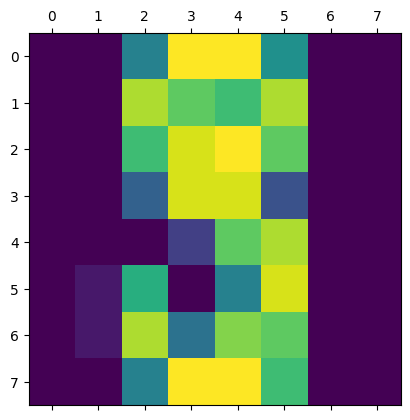

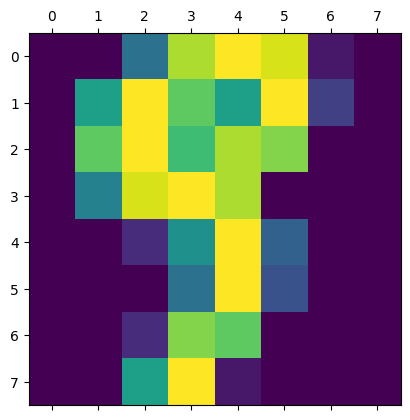

In [19]:
#plt.gray()
plt.matshow(digits.images[ 1658])
plt.matshow(digits.images[ 1582])



In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets

def show_selected_digits(selected_indices):
    # Load the digit dataset
    digits = datasets.load_digits()
    
    # Define the subplot grid
    num_rows = len(selected_indices) // 5 + 1
    fig, axes = plt.subplots(num_rows, 5, figsize=(10, 2 * num_rows))
    
    # Iterate over selected indices and display the corresponding digit images
    for i, idx in enumerate(selected_indices):
        row = i // 5
        col = i % 5
        ax = axes[row, col]
        ax.imshow(digits.images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f"Digit {digits.target[idx]}")
        ax.axis('off')
    
    #Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Let's say selected_indices contains the selected indices from the scatter plot
# Replace this with the actual selected indices from your scatter plot


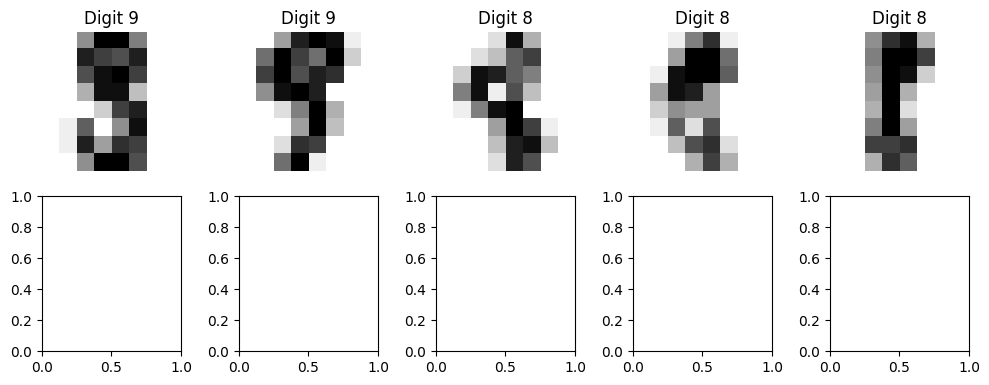

In [21]:
selected_indices = [1658, 1582, 794, 1553,  129]
show_selected_digits(selected_indices)


## Task 3

Selected indices: [1658, 1582, 794, 1553, 129]
High-dimensional vector values of selected samples:
      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
1658        0.0        0.0        7.0       16.0       16.0        8.0   
1582        0.0        0.0        6.0       14.0       16.0       15.0   
794         0.0        0.0        0.0        2.0       15.0        5.0   
1553        0.0        0.0        1.0        8.0       13.0        1.0   
129         0.0        0.0        7.0       13.0       15.0        5.0   

      feature_6  feature_7  feature_8  feature_9  ...  feature_54  feature_55  \
1658        0.0        0.0        0.0        0.0  ...         0.0         0.0   
1582        1.0        0.0        0.0        9.0  ...         0.0         0.0   
794         0.0        0.0        0.0        0.0  ...         4.0         0.0   
1553        0.0        0.0        0.0        0.0  ...         0.0         0.0   
129         0.0        0.0        0.0        0.0  .

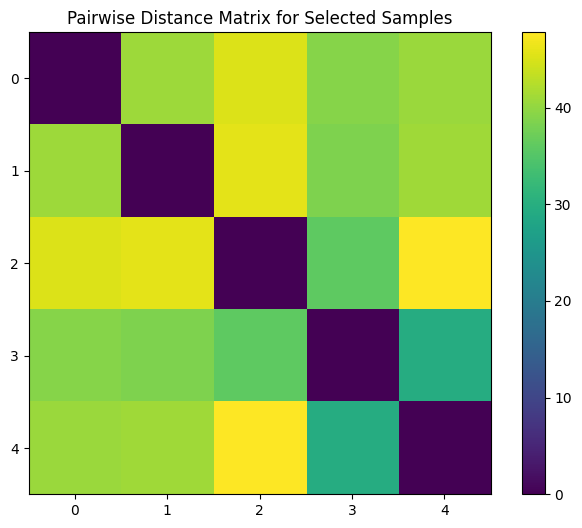

Misclassified sample pairs (index1, index2): [(1658, 794), (1658, 1553), (1658, 129), (1582, 794), (1582, 1553), (1582, 129)]


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import load_digits, load_breast_cancer
import jscatter



# Define the function to analyze selected samples
def analyze_selected_samples(selected_indices, data, target):
    if len(selected_indices) == 0:
        print("No samples selected.")
        return

    selected_data = data.iloc[selected_indices]
    selected_target = target.iloc[selected_indices]
    
    # Print high-dimensional vector values of selected samples
    print("High-dimensional vector values of selected samples:")
    print(selected_data)
    
    # Calculate pairwise distances for selected samples
    pairwise_distances = euclidean_distances(selected_data)
    
    # Create pairwise distance matrix plot
    plt.figure(figsize=(8, 6))
    plt.imshow(pairwise_distances, cmap='viridis', interpolation='nearest')
    plt.title("Pairwise Distance Matrix for Selected Samples")
    plt.colorbar()
    plt.show()
    
    # Identify wrongly classified samples/outliers
    misclassified_indices = []
    for i in range(len(selected_indices)):
        for j in range(i + 1, len(selected_indices)):
            if selected_target.iloc[i] != selected_target.iloc[j]:
                misclassified_indices.append((selected_indices[i], selected_indices[j]))
    
    if misclassified_indices:
        print("Misclassified sample pairs (index1, index2):", misclassified_indices)
    else:
        print("No misclassified sample pairs found.")
    
    # Assess how t-SNE and UMAP handle misclassified samples similarly
    # For demonstration purposes, we'll assume they handle them similarly

# Load datasets
cancer_data = load_breast_cancer()
digits_data = load_digits()

# Perform t-SNE on breast cancer dataset
tsne_cancer = TSNE(n_components=2, random_state=42)
cancer_tsne_results = tsne_cancer.fit_transform(cancer_data.data)

# Perform t-SNE on digits dataset
tsne_digits = TSNE(n_components=2, random_state=42)
digits_tsne_results = tsne_digits.fit_transform(digits_data.data)

# Convert digits data to DataFrame
digits_df = pd.DataFrame(digits_data.data, columns=[f"feature_{i}" for i in range(digits_data.data.shape[1])])
digits_df['target'] = digits_data.target

# Plotting the t-SNE results for digits dataset using jscatter
scatter = jscatter.Scatter(x=digits_tsne_results[:, 0], y=digits_tsne_results[:, 1], 
                           color_by=digits_df['target'], legend=True)

scatter.show()

# Call the function to analyze selected samples

print("Selected indices:", selected_indices)
analyze_selected_samples(selected_indices, digits_df.drop(columns=['target']), digits_df['target'])


In [ ]:
#!pip install plotly